<a href="https://colab.research.google.com/github/MinhTuan76800310/MachineLearning/blob/main/MNIST_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
np.random.seed(0)

In [ ]:
# error
# AttributeError: partially initialized module 'jax' has no attribute 'tree_util' (most likely due to a circular import)
!pip uninstall -y jax jaxlib
!pip install --no-cache-dir jax jaxlib

Found existing installation: jax 0.4.31
Uninstalling jax-0.4.31:
  Successfully uninstalled jax-0.4.31
Found existing installation: jaxlib 0.4.31
Uninstalling jaxlib-0.4.31:
  Successfully uninstalled jaxlib-0.4.31
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 MB 118.4 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 455, in run
    installed = install_given_reqs(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/__init__.py", line 70, in install_given_reqs
    requirement.install(

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(y_train[0])
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(60000,)
5
(10000, 28, 28)
60000


shape of X_train[y_train == 1] (6742, 28, 28)

shape of X_train[y_train == 1][0] (28, 28)


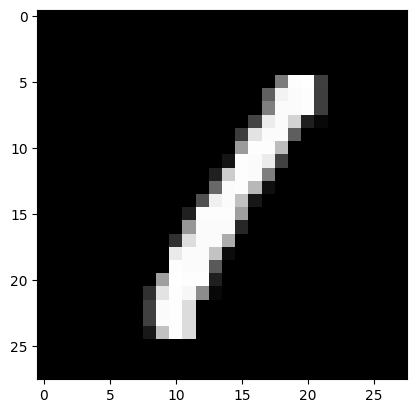

In [12]:
# choose "number" in datasets to data_train by x_selected
print("shape of X_train[y_train == 1]",X_train[y_train == 1].shape)
print("\nshape of X_train[y_train == 1][0]",X_train[y_train == 1][0].shape)

plt.imshow(X_train[y_train == 1][0], cmap=plt.get_cmap("gray"))

In [4]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


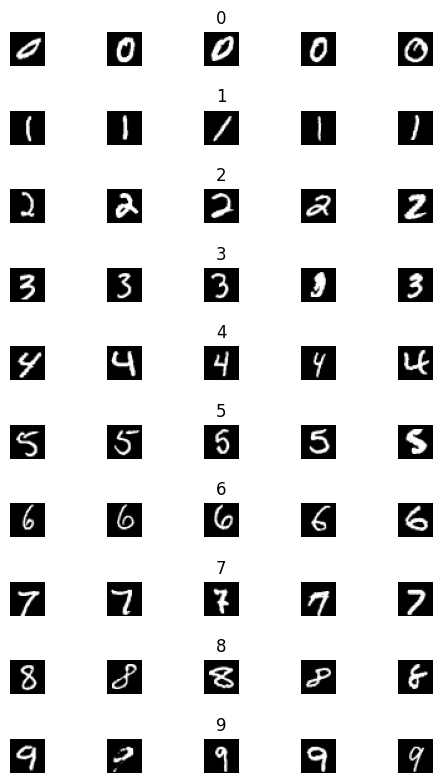

In [13]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
# Each element of num_of_samples is the number of data_train per "number"
print(num_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


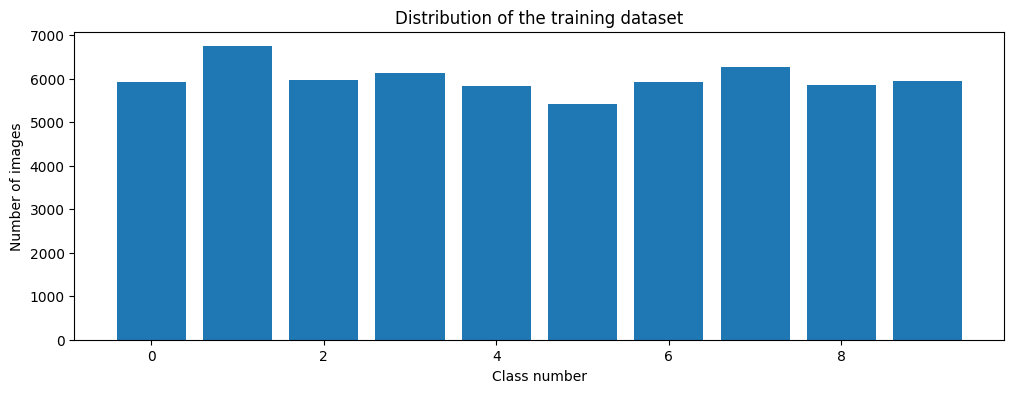

In [14]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,600 (33.59 KB)

 Trainable params: 8,600 (33.59 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7309 - loss: 0.8144 - val_accuracy: 0.9262 - val_loss: 0.2512
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9225 - loss: 0.2644 - val_accuracy: 0.9418 - val_loss: 0.2002
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9309 - loss: 0.2319 - val_accuracy: 0.9428 - val_loss: 0.1940
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9367 - loss: 0.2097 - val_accuracy: 0.9465 - val_loss: 0.1864
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9436 - loss: 0.1895 - val_accuracy: 0.9400 - val_loss: 0.2079
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9419 - loss: 0.1905 - val_accuracy: 0.9527 - val_loss: 0.1647
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9438 - loss: 0.1801 - val_accuracy: 0.9405 - val_loss: 0.2030
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9462 - loss: 0.1748 - val_accurac

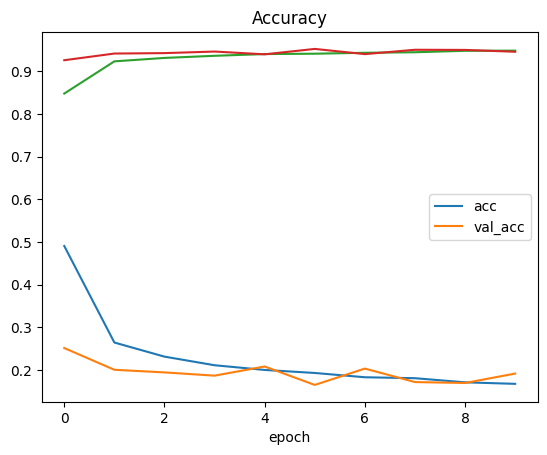

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


model = create_model()
print(model.summary())

history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
predicted digit: [2.2259115e-07 5.0337590e-06 9.9980468e-01 1.0823277e-04 2.1202084e-06
 2.6379032e-09 3.3663337e-08 7.1953225e-05 7.7121204e-06 1.2739593e-11]


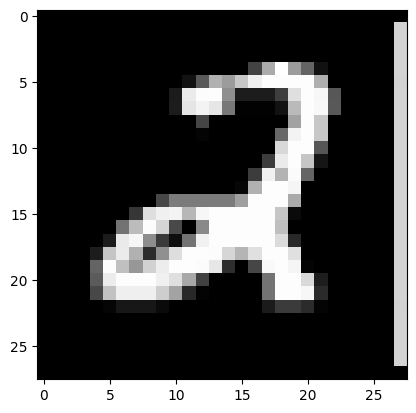

In [ ]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = img/255
img = img.reshape(1, 784)

prediction = model.predict(img)
print("predicted digit:", str(prediction))

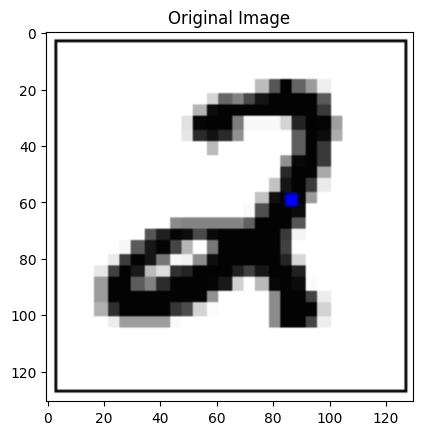

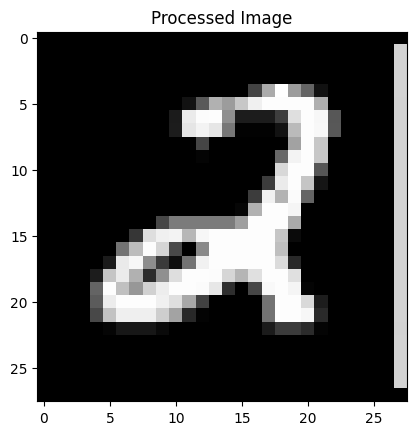

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted digit: 2


In [ ]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

# Load the image from the URL
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)

# Display the original image
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title('Original Image')
plt.show()

# Convert the image to a NumPy array
img = np.asarray(img)

# Resize the image to 28x28
img = cv2.resize(img, (28, 28))

# Convert to grayscale if needed (though it already seems to be grayscale)
if len(img.shape) == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert the colors (MNIST data is white on black)
img = cv2.bitwise_not(img)

# Display the processed image
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title('Processed Image')
plt.show()

# Normalize the image data (scaling pixel values to [0,1])
img = img / 255.0

# Reshape the image to match the input shape for the model (1 sample, 784 features)
img = img.reshape(1, 28 * 28)

# Make the prediction
prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)

# Output the predicted class
print("Predicted digit:", predicted_class[0])
